In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.special as sp


## Problem 1a)

In [3]:
claims = np.loadtxt('/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Econ/Wk4_StrEst/data/clms.txt')
mean = np.mean(claims)
median = np.median(claims)
maximum = np.max(claims)
minimum = np.min(claims)
std = np.std(claims)
print('Descriptive statistics of monthly health claims')
print('Mean:', mean)
print('Median:', median)
print('Maximum:',maximum)
print('Minimum:',minimum)
print('Standard Deviation:', std)

Descriptive statistics of monthly health claims
Mean: 720.277975327
Median: 172.21
Maximum: 227967.25
Minimum: 0.01
Standard Deviation: 3972.66375639


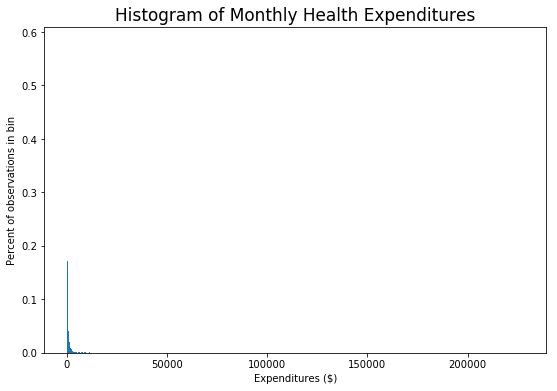

Sum of bin percents: 1.0


In [4]:
num_bins = 1000
weights = (1 / claims.shape[0]) * np.ones_like(claims)
plt.subplots(figsize=(9, 6))
n, bin_cuts, patches = plt.hist(claims, num_bins, weights=weights)
plt.title('Histogram of Monthly Health Expenditures', fontsize=17)
plt.xlabel(r'Expenditures ($)')
plt.ylabel(r'Percent of observations in bin')
plt.show()
print('Sum of bin percents:', n.sum())

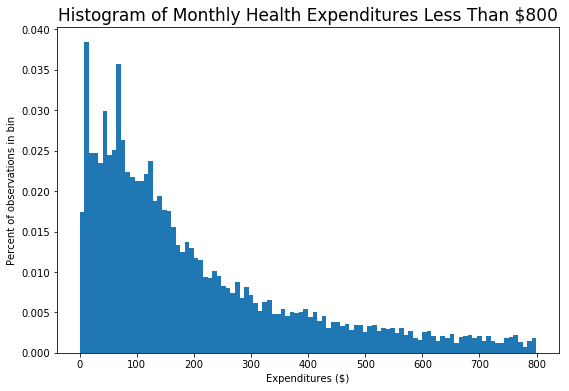

In [5]:
num_bins = 100
mask = claims<=800
plt.subplots(figsize=(9, 6))
n, bin_cuts, patches = plt.hist(claims[mask], num_bins, weights=weights[mask])
plt.title('Histogram of Monthly Health Expenditures Less Than $800', fontsize=17)
plt.xlabel(r'Expenditures ($)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

The second histogram is much more helpful since it contains 90% of the data, and the remaining 10% are far outliers which make the first histogram hard to read.

## Problem 1b)

In [6]:
def gamma_pdf(xvals,alpha,beta):
    pdf_vals = (xvals**(alpha-1))*np.exp(xvals/(-1*beta))/((beta**alpha)*sp.gamma(alpha))
    return pdf_vals

# Define log likelihood function for the gamma distribution
def log_lik_gamma(xvals,alpha,beta):
    pdf_vals = gamma_pdf(xvals,alpha,beta)
    pdf_vals[pdf_vals==0] = 1e-15
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
    
def crit(params, *args):
    alpha,beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

beta_init = (std**2)/mean
alpha_init = mean/beta_init
params_init = np.array([alpha_init, beta_init])
bounds = ((1e-10,None),(1e-10,None))
results = opt.minimize(crit, params_init, args=claims, method='L-BFGS-B',bounds=bounds)
alpha_MLE1, beta_MLE1 = results.x
print(results)
print('alpha_MLE=', alpha_MLE1, ' beta_MLE=', beta_MLE1)
MLE_ga = log_lik_gamma(claims,alpha_MLE1,beta_MLE1)
print('MLE log-likelihood: ', MLE_ga)

      fun: 82076.451605662558
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21755323e-01,   2.19110647e+04])
alpha_MLE= 0.221755322727  beta_MLE= 21911.0646992
MLE log-likelihood:  -82076.4516057


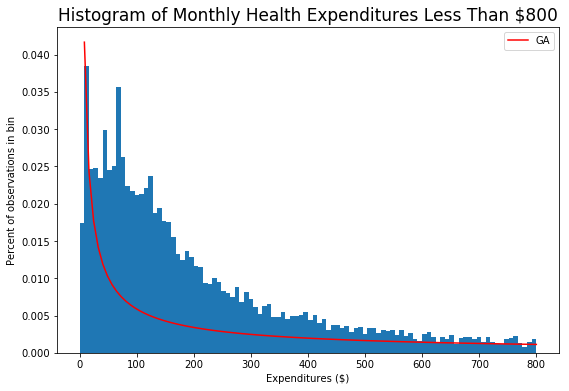

In [14]:
x = np.linspace(0,800,num_bins)
y = 8*sts.gamma.pdf(x,alpha_MLE1,scale=beta_MLE1)
plt.subplots(figsize=(9, 6))
plt.hist(claims[mask], num_bins, weights=weights[mask])
plt.plot(x,y,'r-',label='GA')
plt.title('Histogram of Monthly Health Expenditures Less Than $800', fontsize=17)
plt.xlabel(r'Expenditures ($)')
plt.ylabel(r'Percent of observations in bin')
plt.legend()
plt.show()

# Problem 1c)

In [8]:
def gengamma_pdf(xvals,alpha,beta,m):
    pdf_vals = m*(xvals**(alpha-1))*np.exp(-1*((xvals/beta)**m))/((beta**alpha)*sp.gamma(alpha/m))
    return pdf_vals

# Define log likelihood function for the generalized gamma distribution
def log_lik_gengamma(xvals,alpha,beta,m):
    pdf_vals = gengamma_pdf(xvals,alpha,beta,m)
    pdf_vals[pdf_vals==0] = 1e-15
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
    
def crit2(params, *args):
    alpha,beta,m = params
    xvals = args
    log_lik_val = log_lik_gengamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

beta_init = beta_MLE1
alpha_init = alpha_MLE1
m_init=1
params_init = np.array([alpha_init, beta_init, m_init])
bounds = ((1e-10,None),(1e-10,None),(1e-10,None))
results = opt.minimize(crit2, params_init, args=claims, method='L-BFGS-B',bounds=bounds)
alpha_MLE2, beta_MLE2, m_MLE = results.x
print(results)
print('alpha_MLE=', alpha_MLE2, ' beta_MLE=', beta_MLE2, 'm_MLE', m_MLE)
MLE_gg = log_lik_gengamma(claims,alpha_MLE2,beta_MLE2,m_MLE)
print('MLE log-likelihood: ', MLE_gg)

      fun: 82076.446790851536
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.65544111,  0.09022187, -1.04482751])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21737618e-01,   2.19110644e+04,   9.97091564e-01])
alpha_MLE= 0.221737617595  beta_MLE= 21911.0644318 m_MLE 0.997091563777
MLE log-likelihood:  -82076.4467909


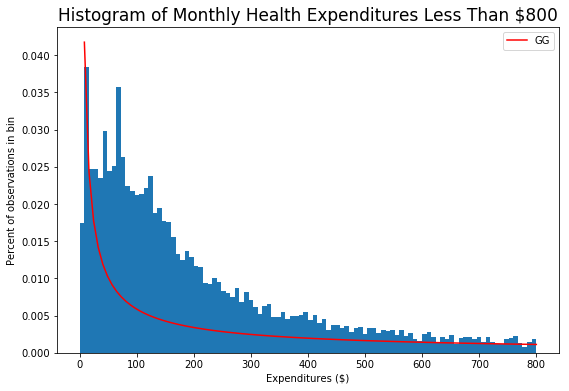

In [16]:
x = np.linspace(0,800,num_bins)
y = 8*sts.gengamma.pdf(x,alpha_MLE2,m_MLE,scale=beta_MLE2)
plt.subplots(figsize=(9, 6))
plt.hist(claims[mask], num_bins, weights=weights[mask])
plt.plot(x,y,'r-',label='GG')
plt.title('Histogram of Monthly Health Expenditures Less Than $800', fontsize=17)
plt.xlabel(r'Expenditures ($)')
plt.ylabel(r'Percent of observations in bin')
plt.legend()
plt.show()

## Problem 1d

In [10]:
def genbeta2_pdf(xvals,a,b,p,q):
    pdf_vals = a*(xvals**(a*p-1))/((b**(a*p))*sp.beta(p,q)*((1+(xvals/b)**a)**(p+q)))
    pdf_vals[pdf_vals==0] = 1e-15
    return pdf_vals

# Define log likelihood function for the generalized beta 2distributiod
def log_lik_genbeta2(xvals,a,b,p,q):
    pdf_vals = genbeta2_pdf(xvals,a,b,p,q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
    
def crit(params, *args):
    a,b,p,q = params
    xvals = args
    log_lik_val = log_lik_genbeta2(xvals, a, b, p,q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

q_init = 10000
b_init = (q_init**(1/m_MLE))*beta_MLE2
a_init = m_MLE
p_init = alpha_MLE2/m_MLE
params_init = np.array([a_init, b_init, p_init, q_init])
bounds = ((1e-10,1e10),(1e-10,1e10),(1e-10,1e10),(1e-10,1e5))
results = opt.minimize(crit, params_init, args=claims, bounds=bounds)
a_MLE, b_MLE, p_MLE, q_MLE = results.x
print(results)
print('a_MLE=', a_MLE, ' b_MLE=', b_MLE, 'p_MLE=', p_MLE, 'q_MLE=', q_MLE)
MLE_gb = log_lik_genbeta2(claims,a_MLE,b_MLE,p_MLE,q_MLE)
print('MLE log-likelihood: ', MLE_gb)

      fun: 76460.142044042863
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 140.80142137,    0.        ,   37.19032975,   16.55280357])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 175
      nit: 12
   status: 0
  success: True
        x: array([  6.99142112e-01,   2.25077020e+08,   9.97346016e-01,
         1.00027494e+04])
a_MLE= 0.699142112438  b_MLE= 225077019.503 p_MLE= 0.997346016321 q_MLE= 10002.7493567
MLE log-likelihood:  -76460.142044


/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


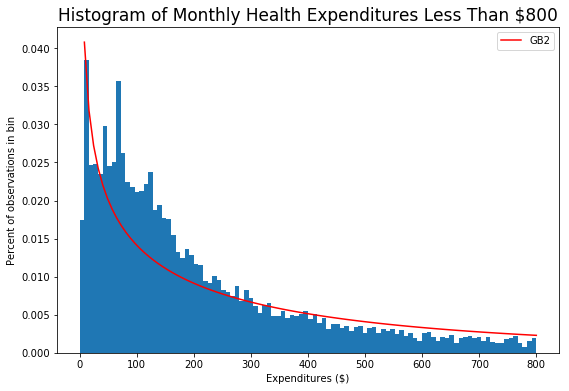

In [17]:
x = np.linspace(0,800,num_bins)
y = 8*genbeta2_pdf(x,a_MLE, b_MLE, p_MLE, q_MLE )
plt.subplots(figsize=(9, 6))
plt.hist(claims[mask], num_bins, weights=weights[mask])
plt.plot(x,y,'r-',label='GB2')
plt.title('Histogram of Monthly Health Expenditures Less Than $800', fontsize=17)
plt.xlabel(r'Expenditures ($)')
plt.ylabel(r'Percent of observations in bin')
plt.legend()
plt.show()

# Problem 1e)

In [12]:
df = 4

LR_val1 = 2 * abs(MLE_gb - MLE_ga)
pval_ga = 1.0 - sts.chi2.cdf(LR_val1, df)
print('chi squared of GA with GB2, 2 degrees of freedom p-value = ', pval_ga)

LR_val2 = 2 * abs(MLE_gb - MLE_gg)
pval_gg = 1.0 - sts.chi2.cdf(LR_val2, df)
print('chi squared of GG with GB2, 2 degrees of freedom p-value = ', pval_gg)

df = 1
LR_val3 = 2 * abs(MLE_gg - MLE_ga)
pval_gagb = 1.0 - sts.chi2.cdf(LR_val3, df)
print('chi squared of GA with GG, 1 degree of freedom p-value = ', pval_gagb)

chi squared of GA with GB2, 2 degrees of freedom p-value =  0.0
chi squared of GG with GB2, 2 degrees of freedom p-value =  0.0
chi squared of GA with GG, 1 degree of freedom p-value =  0.921828559608


Therefore, whereas the GA and GG estimates are not significantly differently, but both are significantly different from GB2 (which gives a much better estimate). Therefore we should use the GB2 distribution rather than the more restricted versions.

# Problem 1f)

In [13]:
x = np.arange(1e-10,2.3e5,10)
GB2 = 10*(np.sum(genbeta2_pdf(x,a_MLE, b_MLE, p_MLE, q_MLE))-np.sum(genbeta2_pdf(x[x<=1000],a_MLE, b_MLE, p_MLE, q_MLE)))
GA = 1-sts.gamma.cdf(1000,alpha_MLE1,scale=beta_MLE1)
print('According the GB2 distribution, the chances of a claim more than $1000 is', GB2)
print('According the GA distribution, the chances of a claim more than $1000 is', GA)

According the GB2 distribution, the chances of a claim more than $1000 is 0.163765483644
According the GA distribution, the chances of a claim more than $1000 is 0.451959744478
